In [30]:
import networkx as nx
import pylab
import numpy as np
import matplotlib.pyplot as plt

In [226]:
def mod_pert_random(low, likely, high, confidence=4, samples=10000):
    """Produce random numbers according to the 'Modified PERT'
    distribution.
    :param low: The lowest value expected as possible.
    :param likely: The 'most likely' value, statistically, the mode.
    :param high: The highest value expected as possible.
    :param confidence: This is typically called 'lambda' in literature
                        about the Modified PERT distribution. The value
                        4 here matches the standard PERT curve. Higher
                        values indicate higher confidence in the mode.
                        Currently allows values 1-18
    :param samples: random number size
    Formulas from "Modified Pert Simulation" by Paulo Buchsbaum.
    """
    # Check minimum & maximum confidence levels to allow:
    if confidence < 1 or confidence > 18:
        raise ValueError('confidence value must be in range 1-18.')

    mean = (low + confidence * likely + high) / (confidence + 2)

    a = (mean - low) / (high - low) * (confidence + 2)
    b = ((confidence + 1) * high - low - confidence * likely) / (high - low)

    beta = np.random.beta(a, b, samples)
    beta = beta * (high - low) + low
    return beta

In [266]:
def mapping(length, width):
    G = nx.grid_2d_graph(length, width)
    n = len(list(G.edges))
    estimate_time = []
    sample_list = []
    low=np.random.randint(1,9)
    high=np.random.randint(low+1,10)
    likely=np.random.randint(low,high)
    #(low, likely, high) = set(np.random.randint(1, 10, 3))
    for repeat in list(range(100)):
        sample_list.append(np.mean(mod_pert_random(low, likely, high, confidence=2)))
    #estimate_time.append(np.mean(sample_list))
    for edge in list(G.edges):
        number=np.random.randint(n)
        G.edges[edge[0],edge[1]]['weight']= sample_list[number]
    return G

In [269]:
G=mapping(4,4)

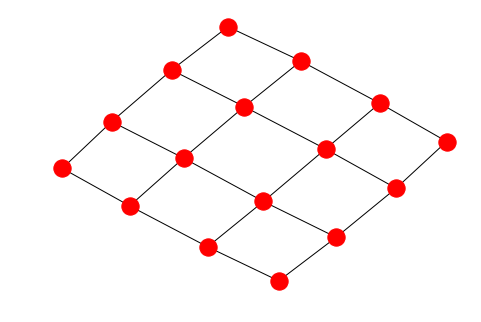

In [271]:
nx.draw(G)

In [270]:
G.edges[(0,0),(0,1)]['weight']

6.250220065301369